In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [5]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [6]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [2]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100,activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10,activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [3]:
[(var.name,var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [2]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,kernel_initializer="he_normal",use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(100,kernel_initializer="he_normal",use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(10,activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30000     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

In [4]:
optimizer=keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="mse",optimizer=optimizer)

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [11]:
model_A=keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28,28]))
for n_hidden in [300,100,50,50,50]:
    model.add(keras.layers.Dense(n_hidden,activation="selu",kernel_initializer="lecun_normal"))
model_A.add(keras.layers.Dense(8,activation="softmax"))

In [14]:
model_A.compile(loss="sparse_categorical_crossentropy",
               optimizer=keras.optimizers.SGD(learning_rate=1e-3),
               metrics=["accuracy"])

In [18]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("my_model_A.h5")
history=model_A.fit(X_train_A,y_train_A,epochs=40,
                 validation_data=(X_valid_A,y_valid_A),
                   callbacks=[checkpoint_cb])


Epoch 1/40
1375/1375 [==============================] - 2s 1ms/step - loss: 0.3348 - accuracy: 0.8901 - val_loss: 0.3306 - val_accuracy: 0.8936
Epoch 2/40
1375/1375 [==============================] - 2s 1ms/step - loss: 0.3332 - accuracy: 0.8906 - val_loss: 0.3294 - val_accuracy: 0.8941
Epoch 3/40
1375/1375 [==============================] - 2s 1ms/step - loss: 0.3317 - accuracy: 0.8911 - val_loss: 0.3276 - val_accuracy: 0.8964
Epoch 4/40
1375/1375 [==============================] - ETA: 0s - loss: 0.3305 - accuracy: 0.89 - 2s 1ms/step - loss: 0.3302 - accuracy: 0.8916 - val_loss: 0.3262 - val_accuracy: 0.8961
Epoch 5/40
1375/1375 [==============================] - 2s 1ms/step - loss: 0.3288 - accuracy: 0.8924 - val_loss: 0.3249 - val_accuracy: 0.8961
Epoch 6/40
1375/1375 [==============================] - 2s 1ms/step - loss: 0.3275 - accuracy: 0.8925 - val_loss: 0.3234 - val_accuracy: 0.8984
Epoch 7/40
1375/1375 [==============================] - 2s 1ms/step - loss: 0.3262 - accuracy:

In [19]:
model_A.evaluate(X_test_A,y_test_A)

250/250 [==============================] - 0s 1ms/step - loss: 0.3159 - accuracy: 0.8936


[0.3158901333808899, 0.893625020980835]

In [20]:
model_A_clone=keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A=keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1,activation="sigmoid"))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable=False
    
model_B_on_A.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [21]:
history=model_B_on_A.fit(X_train_B,y_train_B,epochs=10,
                        validation_data=(X_valid_B,y_valid_B))
for layer in model_B_on_A.layers[:-1]:
    layer.trainable=True
    
model_B_on_A.compile(loss="binary_crossentropy",
                    optimizer=keras.optimizers.SGD(learning_rate=1e-4),
                    metrics=["accuracy"])
history=model_B_on_A.fit(X_train_B,y_train_B,epochs=20,
                        validation_data=(X_valid_B,y_valid_B))

model_B_on_A.evaluate(X_test_B,y_test_B)

Epoch 1/10
7/7 [==============================] - 0s 21ms/step - loss: 0.6752 - accuracy: 0.5700 - val_loss: 0.5764 - val_accuracy: 0.7150
Epoch 2/10
7/7 [==============================] - 0s 8ms/step - loss: 0.5546 - accuracy: 0.7250 - val_loss: 0.4993 - val_accuracy: 0.7748
Epoch 3/10
7/7 [==============================] - 0s 8ms/step - loss: 0.4811 - accuracy: 0.8050 - val_loss: 0.4401 - val_accuracy: 0.8560
Epoch 4/10
7/7 [==============================] - 0s 8ms/step - loss: 0.4219 - accuracy: 0.8350 - val_loss: 0.3950 - val_accuracy: 0.8976
Epoch 5/10
7/7 [==============================] - 0s 8ms/step - loss: 0.3768 - accuracy: 0.8600 - val_loss: 0.3600 - val_accuracy: 0.9158
Epoch 6/10
7/7 [==============================] - 0s 8ms/step - loss: 0.3411 - accuracy: 0.9050 - val_loss: 0.3294 - val_accuracy: 0.9351
Epoch 7/10
7/7 [==============================] - 0s 8ms/step - loss: 0.3105 - accuracy: 0.9600 - val_loss: 0.3058 - val_accuracy: 0.9412
Epoch 8/10
7/7 [=================

[0.254163920879364, 0.9679999947547913]

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(200,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(50,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(10,activation="softmax")
])

optimizer=keras.optimizers.SGD(learning_rate=1e-2,decay=1e-4)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [6]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5811 - accuracy: 0.7966 - val_loss: 0.4547 - val_accuracy: 0.8374
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4412 - accuracy: 0.8424 - val_loss: 0.4057 - val_accuracy: 0.8570
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4099 - accuracy: 0.8527 - val_loss: 0.4050 - val_accuracy: 0.8572
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3915 - accuracy: 0.8597 - val_loss: 0.3835 - val_accuracy: 0.8628
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3783 - accuracy: 0.8654 - val_loss: 0.3703 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3674 - accuracy: 0.8682 - val_loss: 0.3700 - val_accuracy: 0.8684
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3590 - accuracy: 0.8697 - val_loss: 0.3653 - val_accuracy:

313/313 [==============================] - 0s 951us/step - loss: 0.3573 - accuracy: 0.8727


[0.3572896718978882, 0.8726999759674072]

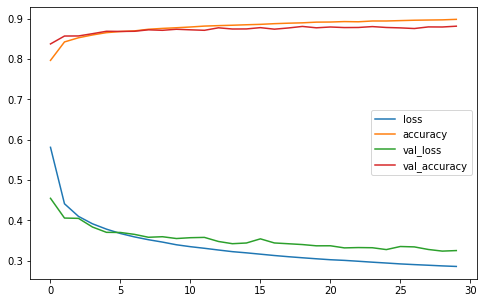

In [8]:
pd.DataFrame(history.history).plot(figsize=(8,5))
model.evaluate(X_test,y_test)

In [9]:
def exponential_decay(lr,s):
    def exponential_decay_fn(epoch):
        return lr*(0.1**(epoch/s))
    return exponential_decay_fn

In [13]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(200,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(50,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(10,activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [14]:
learning_rate=1e-2
s=20
lr_cb=keras.callbacks.LearningRateScheduler(exponential_decay(lr=learning_rate,s=s))
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid),
                 callbacks=[lr_cb])

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6716 - accuracy: 0.7709 - val_loss: 0.5852 - val_accuracy: 0.8004
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4837 - accuracy: 0.8308 - val_loss: 0.6581 - val_accuracy: 0.7394
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4283 - accuracy: 0.8497 - val_loss: 0.4004 - val_accuracy: 0.8600
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3948 - accuracy: 0.8629 - val_loss: 0.4128 - val_accuracy: 0.8666
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3693 - accuracy: 0.8705 - val_loss: 0.4084 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3496 - accuracy: 0.8782 - val_loss: 0.3883 - val_accuracy: 0.8646
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3301 - accuracy: 0.8831 - val_loss: 0.3561 - val_accuracy:

313/313 [==============================] - 0s 925us/step - loss: 0.4178 - accuracy: 0.8905


[0.4177727997303009, 0.890500009059906]

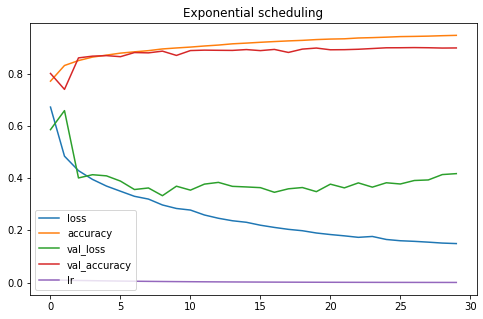

In [15]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("Exponential scheduling")
model.evaluate(X_test,y_test)

In [16]:
def piecewise_constant_scheduling(epoch):
    if epoch < 10:
        return 1e-2
    elif epoch < 20:
        return 1e-3
    elif epoch < 30:
        return 3e-4

In [20]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(200,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(50,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(10,activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [21]:
lr_cb=keras.callbacks.LearningRateScheduler(piecewise_constant_scheduling)
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid),
                 callbacks=[lr_cb])

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6534 - accuracy: 0.7726 - val_loss: 0.4961 - val_accuracy: 0.8282
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5108 - accuracy: 0.8241 - val_loss: 0.4691 - val_accuracy: 0.8446
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4623 - accuracy: 0.8426 - val_loss: 0.6252 - val_accuracy: 0.8236
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4405 - accuracy: 0.8494 - val_loss: 0.4229 - val_accuracy: 0.8548
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4684 - accuracy: 0.8521 - val_loss: 0.3863 - val_accuracy: 0.8750
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4207 - accuracy: 0.8589 - val_loss: 0.5312 - val_accuracy: 0.8272
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4578 - accuracy: 0.8561 - val_loss: 0.3902 - val_accuracy:

313/313 [==============================] - 0s 952us/step - loss: 0.4143 - accuracy: 0.8846


[0.41425392031669617, 0.8845999836921692]

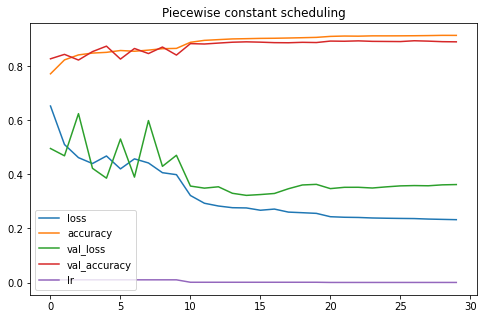

In [22]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("Piecewise constant scheduling")
model.evaluate(X_test,y_test)

In [23]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(200,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(50,activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dense(10,activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

lr_scheduler=keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=5)

history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid),
                 callbacks=[lr_scheduler])

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4898 - accuracy: 0.8209 - val_loss: 0.3853 - val_accuracy: 0.8628
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3781 - accuracy: 0.8594 - val_loss: 0.3920 - val_accuracy: 0.8578
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3437 - accuracy: 0.8728 - val_loss: 0.3392 - val_accuracy: 0.8728
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3213 - accuracy: 0.8795 - val_loss: 0.3217 - val_accuracy: 0.8836
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3005 - accuracy: 0.8880 - val_loss: 0.3191 - val_accuracy: 0.8868
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2873 - accuracy: 0.8918 - val_loss: 0.3177 - val_accuracy: 0.8854
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2754 - accuracy: 0.8961 - val_loss: 0.3135 - val_accuracy:

313/313 [==============================] - 0s 917us/step - loss: 0.4553 - accuracy: 0.8964


[0.45532166957855225, 0.896399974822998]

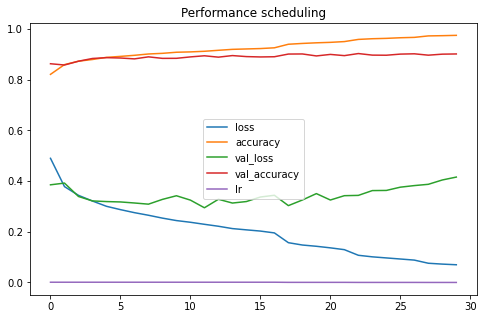

In [24]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("Performance scheduling")
model.evaluate(X_test,y_test)

In [40]:
from functools import partial
#l1 and l2 reg

RegularizedDense=partial(keras.layers.Dense,
                         activation="selu",
                         kernel_initializer="lecun_normal",
                         kernel_regularizer=keras.regularizers.l2(0.001))

model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    RegularizedDense(200),
    RegularizedDense(100),
    RegularizedDense(50),
    RegularizedDense(10,activation="softmax",kernel_initializer="glorot_normal")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

lr_scheduler=keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=5)

history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid),
                 callbacks=[lr_scheduler])

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7637 - accuracy: 0.8159 - val_loss: 0.6013 - val_accuracy: 0.8548
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5848 - accuracy: 0.8429 - val_loss: 0.5293 - val_accuracy: 0.8558
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5357 - accuracy: 0.8514 - val_loss: 0.5130 - val_accuracy: 0.8564
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5099 - accuracy: 0.8551 - val_loss: 0.4998 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4965 - accuracy: 0.8594 - val_loss: 0.4847 - val_accuracy: 0.8610
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4861 - accuracy: 0.8616 - val_loss: 0.4886 - val_accuracy: 0.8614
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4794 - accuracy: 0.8645 - val_loss: 0.4893 - val_accuracy:

313/313 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.8722


[0.4550010859966278, 0.8722000122070312]

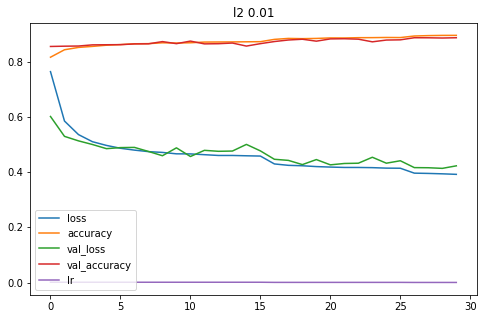

In [42]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("l2 0.001")
model.evaluate(X_test,y_test)

In [43]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(200,activation="selu",kernel_initializer="lecun_normal",
                      kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal",
                      kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(50,activation="selu",kernel_initializer="lecun_normal",
                      kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10,activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

lr_scheduler=keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=5)

history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid),
                 callbacks=[lr_scheduler])

Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.6901 - accuracy: 0.7643 - val_loss: 0.4673 - val_accuracy: 0.8484
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5501 - accuracy: 0.8164 - val_loss: 0.4562 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5320 - accuracy: 0.8238 - val_loss: 0.4504 - val_accuracy: 0.8606
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5156 - accuracy: 0.8300 - val_loss: 0.4420 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5083 - accuracy: 0.8369 - val_loss: 0.4450 - val_accuracy: 0.8562
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5037 - accuracy: 0.8392 - val_loss: 0.4229 - val_accuracy: 0.8652
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4959 - accuracy: 0.8431 - val_loss: 0.4220 - val_accuracy:

313/313 [==============================] - 0s 996us/step - loss: 0.4300 - accuracy: 0.8645


[0.43002474308013916, 0.8644999861717224]

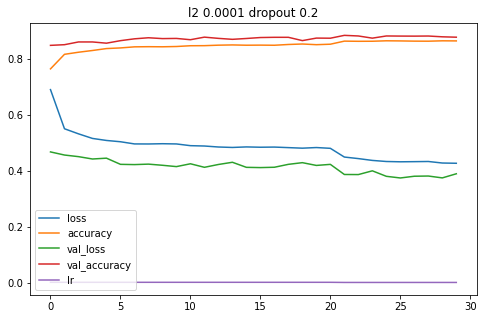

In [44]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("l2 0.0001 dropout 0.2")
model.evaluate(X_train,y_train)
model.evaluate(X_valid,y_valid)
model.evaluate(X_test,y_test)

In [45]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(200,activation="selu",kernel_initializer="lecun_normal",
                      kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal",
                      kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(50,activation="selu",kernel_initializer="lecun_normal",
                      kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10,activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

lr_scheduler=keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=5)

history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid),
                 callbacks=[lr_scheduler])

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7167 - accuracy: 0.7572 - val_loss: 0.6232 - val_accuracy: 0.8440
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5396 - accuracy: 0.8286 - val_loss: 0.5688 - val_accuracy: 0.8568
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5128 - accuracy: 0.8397 - val_loss: 0.5167 - val_accuracy: 0.8672
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4980 - accuracy: 0.8463 - val_loss: 0.5344 - val_accuracy: 0.8716
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4880 - accuracy: 0.8495 - val_loss: 0.5793 - val_accuracy: 0.8606
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4795 - accuracy: 0.8553 - val_loss: 0.6206 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4749 - accuracy: 0.8557 - val_loss: 0.6065 - val_accuracy:

313/313 [==============================] - 0s 1ms/step - loss: 0.5124 - accuracy: 0.8838


[0.5124369263648987, 0.8838000297546387]

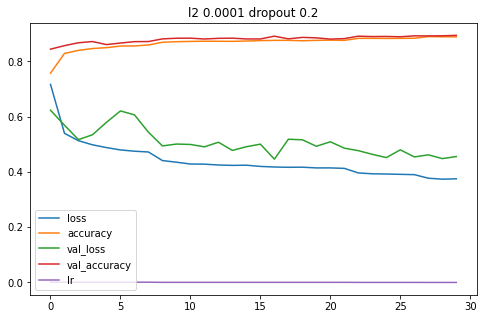

In [46]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("l2 0.0001 dropout 0.2")
model.evaluate(X_train,y_train)
model.evaluate(X_valid,y_valid)
model.evaluate(X_test,y_test)

In [47]:
y_probas=np.stack([model(X_test,training=True) for sample in range(100)])
y_proba=y_probas.mean(axis=0)
y_pred = np.argmax(y_proba, axis=1)
accuracy=np.sum(y_pred==y_test)/len(y_test)
accuracy

0.8807